In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

from scipy.interpolate import RegularGridInterpolator

In [2]:
# x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.direction'] = 'in'
# y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams["axes.grid"] = False
cm = 1/2.54
plt.rcParams['figure.figsize'] = plt.rcParamsDefault["figure.figsize"]

実効屈折率の波長・膜厚依存性を読み込み

In [39]:
file_path = r"inc.xlsx"

In [41]:
df = pd.read_excel(file_path)

In [42]:
df

,wavelength,FT356,FT357,FT358,FT359,FT360,FT361,FT362,FT363,FT364,...,ST364,k356,k357,k358,k359,k360,k361,k362,k363,k364
0,450,2.051240,2.051569,2.051894,2.052218,2.052539,2.052859,2.053176,2.053491,2.053803,...,2.124092,4.373794,4.553621,4.558182,4.550071,4.537020,4.520462,4.500831,4.478285,4.452862
1,452,2.049618,2.049948,2.050276,2.050602,2.050925,2.051246,2.051565,2.051882,2.052197,...,2.111439,4.452165,4.163281,4.498711,4.509502,4.501163,4.486746,4.468501,4.447063,4.422640
2,454,2.048010,2.048342,2.048672,2.048999,2.049325,2.049648,2.049969,2.050287,2.050604,...,2.098965,4.495183,4.444502,3.428173,4.432257,4.457806,4.450078,4.434438,4.414475,4.391073
3,456,2.046416,2.046750,2.047081,2.047411,2.047738,2.048063,2.048386,2.048706,2.049025,...,2.086669,4.468211,4.457650,4.421758,3.817967,4.351899,4.403583,4.396950,4.379982,4.357986
4,458,2.044835,2.045171,2.045504,2.045836,2.046165,2.046492,2.046816,2.047139,2.047459,...,2.074551,4.433986,4.428576,4.417214,4.387293,4.062990,4.271225,4.348739,4.341947,4.322730
5,460,2.043267,2.043605,2.043940,2.044273,2.044604,2.044933,2.045260,2.045584,2.045906,...,2.062606,4.397465,4.393946,4.386790,4.374202,4.345066,4.027065,4.235461,4.296501,4.284694
6,462,2.041712,2.042051,2.042389,2.042724,2.043057,2.043388,2.043716,2.044042,2.044366,...,2.050832,4.359633,4.357322,4.351939,4.343055,4.328781,4.293575,3.138610,4.240506,4.246445
7,464,2.040169,2.040511,2.040850,2.041187,2.041522,2.041854,2.042185,2.042513,2.042839,...,2.039227,4.320740,4.319446,4.315271,4.308111,4.297496,4.280256,4.142276,4.207597,4.216953
8,466,2.038638,2.038982,2.039323,2.039662,2.039999,2.040334,2.040666,2.040996,2.041324,...,2.027807,4.280817,4.280486,4.277344,4.271391,4.262554,4.250091,4.123745,4.209536,4.193419
9,468,2.037120,2.037465,2.037808,2.038149,2.038488,2.038824,2.039159,2.039491,2.039820,...,2.016572,4.239797,4.240418,4.238226,4.233236,4.225452,4.214855,4.201411,4.184955,4.165217


In [43]:
df.shape

(11, 28)

実効屈折率のメッシュから特定の波長と膜厚における実効屈折率を推定する

In [44]:
row_wavelength = np.arange(450, 471, 2)
col_thickness = np.arange(356, 365, 1)

In [73]:
NFs = np.array(df.iloc[:, 1:10])
NSs = np.array(df.iloc[:, 10:19])
ks = np.array(df.iloc[:, 19:29])

In [74]:
df.iloc[:, 1:10]

,FT356,FT357,FT358,FT359,FT360,FT361,FT362,FT363,FT364
0,2.051240,2.051569,2.051894,2.052218,2.052539,2.052859,2.053176,2.053491,2.053803
1,2.049618,2.049948,2.050276,2.050602,2.050925,2.051246,2.051565,2.051882,2.052197
2,2.048010,2.048342,2.048672,2.048999,2.049325,2.049648,2.049969,2.050287,2.050604
3,2.046416,2.046750,2.047081,2.047411,2.047738,2.048063,2.048386,2.048706,2.049025
4,2.044835,2.045171,2.045504,2.045836,2.046165,2.046492,2.046816,2.047139,2.047459
5,2.043267,2.043605,2.043940,2.044273,2.044604,2.044933,2.045260,2.045584,2.045906
6,2.041712,2.042051,2.042389,2.042724,2.043057,2.043388,2.043716,2.044042,2.044366
7,2.040169,2.040511,2.040850,2.041187,2.041522,2.041854,2.042185,2.042513,2.042839
8,2.038638,2.038982,2.039323,2.039662,2.039999,2.040334,2.040666,2.040996,2.041324
9,2.037120,2.037465,2.037808,2.038149,2.038488,2.038824,2.039159,2.039491,2.039820


In [75]:
df.iloc[:, 19:29]

,k356,k357,k358,k359,k360,k361,k362,k363,k364
0,4.373794,4.553621,4.558182,4.550071,4.537020,4.520462,4.500831,4.478285,4.452862
1,4.452165,4.163281,4.498711,4.509502,4.501163,4.486746,4.468501,4.447063,4.422640
2,4.495183,4.444502,3.428173,4.432257,4.457806,4.450078,4.434438,4.414475,4.391073
3,4.468211,4.457650,4.421758,3.817967,4.351899,4.403583,4.396950,4.379982,4.357986
4,4.433986,4.428576,4.417214,4.387293,4.062990,4.271225,4.348739,4.341947,4.322730
5,4.397465,4.393946,4.386790,4.374202,4.345066,4.027065,4.235461,4.296501,4.284694
6,4.359633,4.357322,4.351939,4.343055,4.328781,4.293575,3.138610,4.240506,4.246445
7,4.320740,4.319446,4.315271,4.308111,4.297496,4.280256,4.142276,4.207597,4.216953
8,4.280817,4.280486,4.277344,4.271391,4.262554,4.250091,4.123745,4.209536,4.193419
9,4.239797,4.240418,4.238226,4.233236,4.225452,4.214855,4.201411,4.184955,4.165217


In [76]:
xx, yy = np.meshgrid(col_thickness, row_wavelength)

生データのチェック

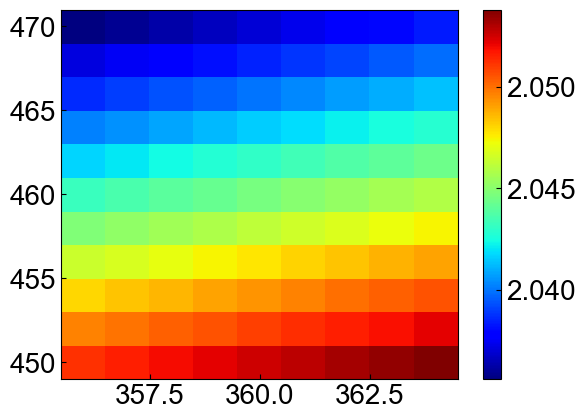

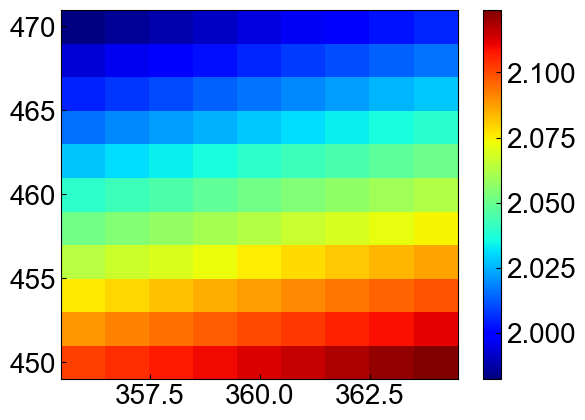

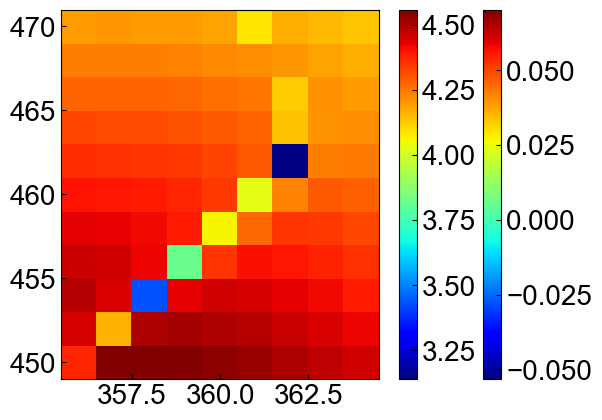

In [77]:
plt.figure()
plt.pcolor(xx, yy, NFs, cmap='jet')
plt.colorbar()
plt.figure()
plt.pcolor(xx, yy, NSs, cmap='jet')
plt.colorbar()
plt.figure()
plt.pcolor(xx, yy, NSs-NFs, cmap='jet')
plt.colorbar()
plt.pcolor(xx, yy, ks, cmap='jet')
plt.colorbar()

2次元の補完をcubicで行う

In [78]:
f_NF = RegularGridInterpolator(
    (row_wavelength, col_thickness), NFs, method='linear')
f_NS = RegularGridInterpolator(
    (row_wavelength, col_thickness), NSs, method='linear')
f_k = RegularGridInterpolator(
    (row_wavelength, col_thickness), ks, method='linear')

In [79]:
gene_row_wavelength = np.arange(450, 470, 0.05)
gene_col_thickness = np.arange(356, 364, 0.05)
gene_xx, gene_yy = np.meshgrid(gene_col_thickness, gene_row_wavelength)

In [82]:
gene_NFs = f_NF((gene_yy, gene_xx))
gene_NSs = f_NS((gene_yy, gene_xx))
gene_ks = f_k((gene_yy, gene_xx))

生データと補完データを比較

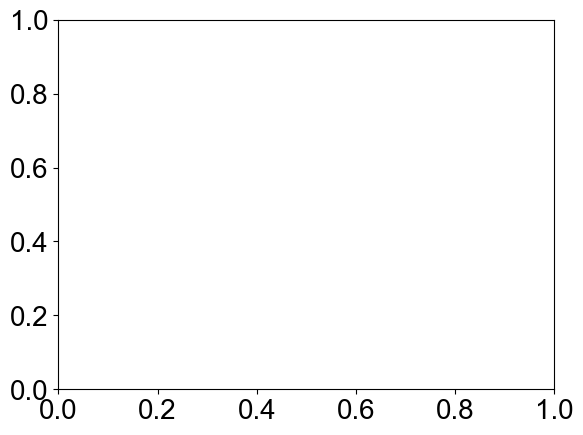

In [51]:
plt.rcParams.update({'font.size': 20})
plt.tick_params(axis='both', direction='out')

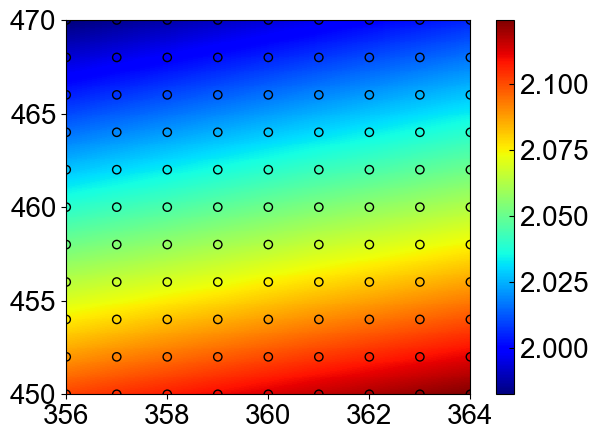

In [52]:

plt.pcolor(gene_xx, gene_yy, gene_NSs, cmap='jet')
plt.scatter(xx, yy, c=NSs, cmap='jet', edgecolors='black')
plt.colorbar()
# plt.contour(gene_xx, gene_yy, gene_NSs - gene_NFs, levels=[0], colors='white', linewidths=2)
plt.xlim(356, 364)
plt.ylim(450, 470)


# 軸目盛を外側に配置
plt.tick_params(direction='out')  # 長さと幅を指定して明確にする

plt.tight_layout()

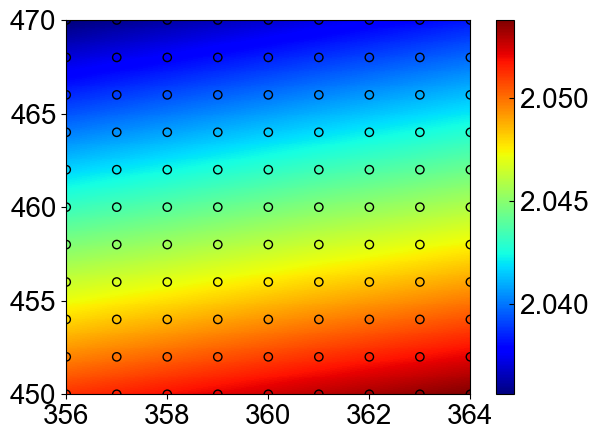

In [53]:

plt.pcolor(gene_xx, gene_yy, gene_NFs, cmap='jet')
plt.scatter(xx, yy, c=NFs, cmap='jet', edgecolors='black')
plt.colorbar()
# plt.contour(gene_xx, gene_yy, gene_NSs - gene_NFs, levels=[0], colors='white', linewidths=2)
plt.xlim(356, 364)
plt.ylim(450, 470)

# 軸目盛を外側に配置
plt.tick_params(direction='out')  # 長さと幅を指定して明確にする
plt.tight_layout()

(450.0, 470.0)

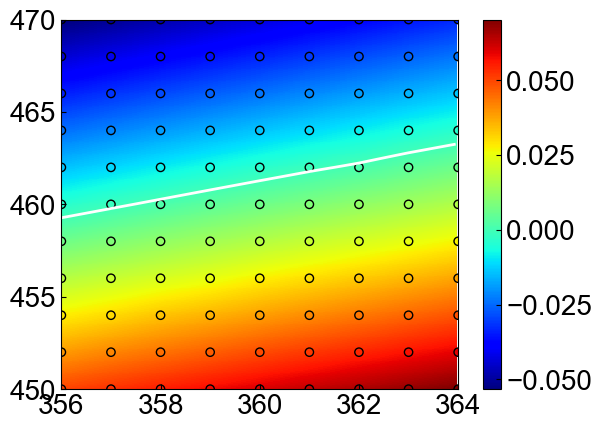

In [54]:
plt.figure()
plt.pcolor(gene_xx, gene_yy, gene_NSs-gene_NFs, cmap='jet')
plt.scatter(xx, yy, c=(NSs-NFs), cmap='jet', edgecolors='black')
plt.colorbar()
plt.contour(gene_xx, gene_yy, gene_NSs - gene_NFs,
            levels=[0], colors='white', linewidths=2)
plt.xlim(356, 364)
plt.ylim(450, 470)

(450.0, 470.0)

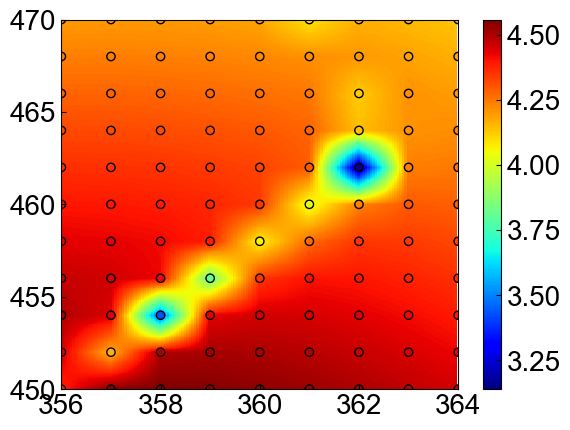

In [84]:
plt.figure()
plt.pcolor(gene_xx, gene_yy, gene_ks, cmap='jet')
plt.scatter(xx, yy, c=ks, cmap='jet', edgecolors='black')
plt.colorbar()
plt.contour(gene_xx, gene_yy, gene_ks, levels=[
            0], colors='white', linewidths=2)
plt.xlim(356, 364)
plt.ylim(450, 470)

非線形モード結合方程式
$$
\frac{d}{dz}B(z)=-jk[A(z)]^2\exp(+j(2\Delta)z) \tag{1}
$$

NPDAにおける解析解
$$
B(z)=-jk(A_0)^2z\exp(+j\Delta )\frac{\sin(\Delta z)}{\Delta z} \tag{2}
$$
栖原先生黄色本式(3.13)より

以下Bは式(2)、BdBは式(1)を実装したもの

In [18]:
def B(z, k, A0, wl, NF, NSH):
    betaF = NF*2*np.pi/(wl*10**-9)
    betaSH = NSH*2*np.pi/((wl/2)*10**-9)
    delta = (betaSH-2*betaF)/2

    Bz = []

    for temp_z in z:
        temp_A = A0*np.exp(1j*betaF*temp_z)
        temp_B = -1j*k*temp_A**2*temp_z * \
            np.exp(1j*delta*temp_z)*np.sinc(delta*temp_z/np.pi)
        Bz.append(temp_B)
    return Bz


def BdB(z, dz, k, A0, wl, NF, NSH):
    betaF = NF*2*np.pi/(wl*10**-9)
    betaSH = NSH*2*np.pi/((wl/2)*10**-9)
    delta = (betaSH-2*betaF)/2

    Bz = []

    A = A0

    temp_B = 0

    Bz.append(temp_B)

    for temp_z in z[0:-1]:
        A = A0*np.exp(1j*betaF*temp_z)

        temp_B = temp_B*np.exp(1j*betaSH*dz)-1j*k*A**2*np.exp(1j*2*delta*dz)*dz
        Bz.append(temp_B)
    return Bz

作った関数の伝搬距離依存性を求める

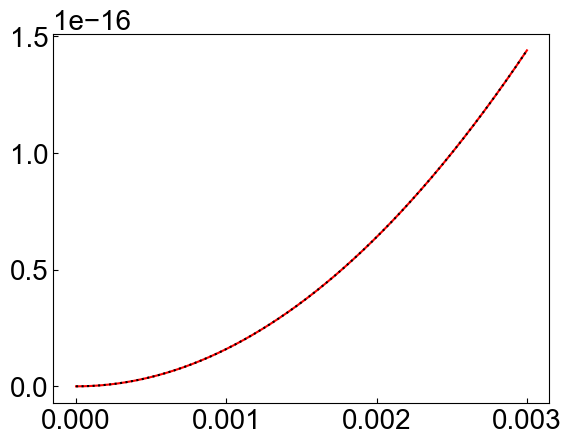

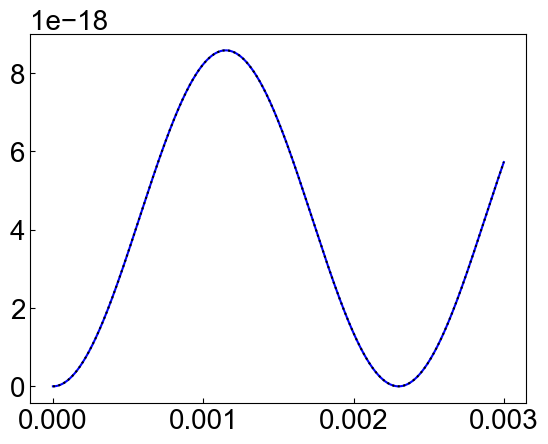

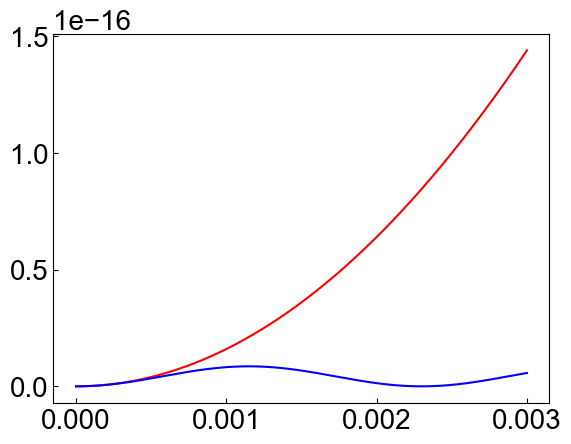

In [19]:
L = 3  # mm
dz = 0.001  # mm

k = 4

wl = 460

NF = 2
NSH = 2

dN = 0.0001

A0 = 0.001

z = np.arange(0, L+dz, dz)/1000
dz = dz/1000


B0 = B(z, k, A0, wl, NF, NSH+dN*0)
B1 = B(z, k, A0, wl, NF, NSH+dN*1)
BdB0 = BdB(z, dz, k, A0, wl, NF, NSH+dN*0)
BdB1 = BdB(z, dz, k, A0, wl, NF, NSH+dN*1)

plt.figure()
plt.plot(z, abs(np.array(B0))**2, c='r')
plt.plot(z, abs(np.array(BdB0))**2, ':', c='black')

plt.figure()
plt.plot(z, abs(np.array(B1))**2, c='b')
plt.plot(z, abs(np.array(BdB1))**2, ':', c='black')

plt.figure()
plt.plot(z, abs(np.array(BdB0))**2, c='r')
plt.plot(z, abs(np.array(BdB1))**2, c='b')

波長掃引したときにsinc関数になるか確認

[0.04] nm
[0.02] nm
[0.0133] nm


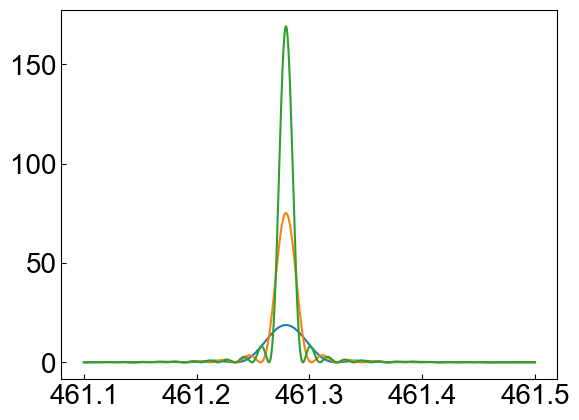

In [117]:
L = 1  # mm
dz = 0.001  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)

T = 360  # 中心膜厚

P0 = 0.1
A0 = np.sqrt(P0)
k = 4

wls = np.arange(461.1, 461.5, 0.0001)

betaFs = f_NS((wls, T))*2*np.pi/(wl*10**-9)
betaSHs = f_NF((wls, T))*2*np.pi/((wl/2)*10**-9)
deltas = (betaSHs-2*betaFs)/2
cal_ks = f_k((wls, T))*100
etas = cal_ks**2*P0*L**2*np.sinc(deltas*L/np.pi)**2
y = np.array(etas)*100/P0
plt.plot(wls, np.array(etas)*100/P0)
y1 = y

sign = np.sign(y-max(y)/2)
FWFM1, FWFM2 = np.argwhere(sign[0:-2]*sign[1:-1] < 0)
print((wls[FWFM2]-wls[FWFM1]), 'nm')

L = 2  # mm
dz = 0.001  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)

T = 360  # 中心膜厚

P0 = 0.1
A0 = np.sqrt(P0)
k = 4

wls = np.arange(461.1, 461.5, 0.0001)

betaFs = f_NS((wls, T))*2*np.pi/(wl*10**-9)
betaSHs = f_NF((wls, T))*2*np.pi/((wl/2)*10**-9)
deltas = (betaSHs-2*betaFs)/2
cal_ks = f_k((wls, T))*100
etas = cal_ks**2*P0*L**2*np.sinc(deltas*L/np.pi)**2
y = np.array(etas)*100/P0
plt.plot(wls, np.array(etas)*100/P0)
y2 = y

sign = np.sign(y-max(y)/2)
FWFM1, FWFM2 = np.argwhere(sign[0:-2]*sign[1:-1] < 0)
print((wls[FWFM2]-wls[FWFM1]), 'nm')

L = 3  # mm
dz = 0.001  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)

T = 360  # 中心膜厚

P0 = 0.1
A0 = np.sqrt(P0)
k = 4

wls = np.arange(461.1, 461.5, 0.0001)

betaFs = f_NS((wls, T))*2*np.pi/(wl*10**-9)
betaSHs = f_NF((wls, T))*2*np.pi/((wl/2)*10**-9)
deltas = (betaSHs-2*betaFs)/2
cal_ks = f_k((wls, T))*100
etas = cal_ks**2*P0*L**2*np.sinc(deltas*L/np.pi)**2
y = np.array(etas)*100/P0
plt.plot(wls, np.array(etas)*100/P0)
y3 = y

sign = np.sign(y-max(y)/2)
FWFM1, FWFM2 = np.argwhere(sign[0:-2]*sign[1:-1] < 0)
print((wls[FWFM2]-wls[FWFM1]), 'nm')

data = pd.DataFrame([wls, y1, y2, y3]).T
filename = f'幅0.6mm導波路のsinc関数.dat'
data.to_csv(filename, index=False, header=['wavelength', '1mm', '2mm', '3mm'])

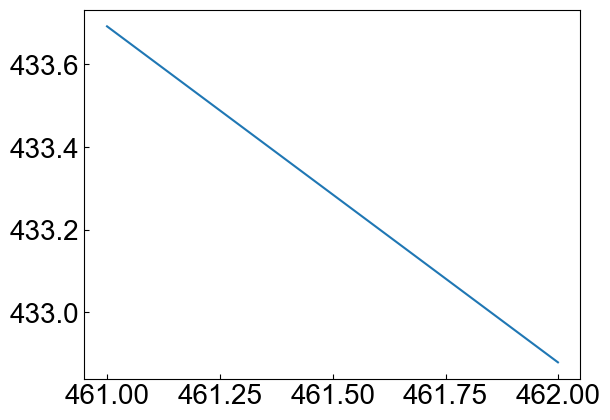

In [101]:
plt.plot(wls, cal_ks)

微分方程式をもとに区分求積で求めた結果と積分によって得られた方程式の解が一致することが確認できた

膜厚傾斜を考慮できるようにBdB関数を修正する

ついでに波長変換によるポンプ光の減衰
$$
\frac{d}{dz}A(z)=-jk^{*}A(z)^{*}B(z)\exp(-j(2\Delta)z) \tag{3}
$$
も考慮する


In [21]:
def deltaA(dz, k, A, B, wl, NF, NSH):
    betaF = NF*2*np.pi/(wl*10**-9)
    betaSH = NSH*2*np.pi/((wl/2)*10**-9)
    delta = (betaSH-2*betaF)/2
    return -1j*k.conjugate()*A.conjugate()*B*np.exp(-1j*2*delta*dz)*dz


def deltaB(dz, k, A, wl, NF, NSH):
    betaF = NF*2*np.pi/(wl*10**-9)
    betaSH = NSH*2*np.pi/((wl/2)*10**-9)
    delta = (betaSH-2*betaF)/2
    return -1j*k*A**2*np.exp(1j*2*delta*dz)*dz


def wave(z, N, wl):
    beta = N*2*np.pi/(wl*10**-9)
    return np.exp(1j*beta*z)

Aの変化も実装

先に作った関数と一致を確認

(途中一致しなかったのは引数NSHに代入してる値が違ったから)

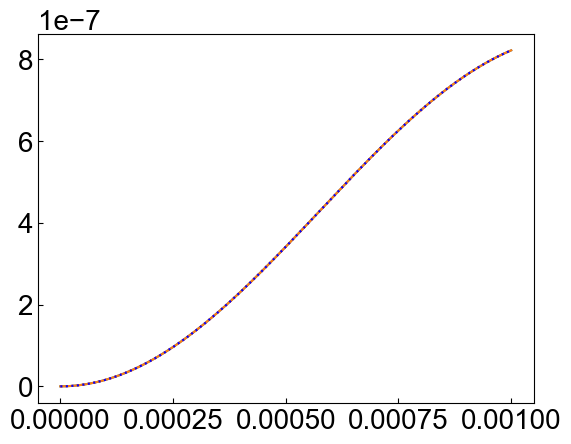

In [22]:
wl = 460  # nm

L = 1  # mm
dz = 0.001  # mm
z = np.arange(0, L+dz, dz)/1000
dz = dz/1000

NF = 2
dN = 0.0001
NSH = NF+dN

betaF = NF*2*np.pi/(wl*10**-9)
betaSH = NSH*2*np.pi/((wl/2)*10**-9)
delta = (betaSH-2*betaF)/2

k = 4

P0 = 0.1
A0 = np.sqrt(A0)  # 振幅の初期値
B0 = 0  # 振幅の初期値

B1 = B(z, k, A0, wl, NF, NSH)
BdB1 = BdB(z, dz, k, A0, wl, NF, NSH)

Az = [A0]  # zの関数。以降で逐次計算する
Bz = [B0]  # zの関数
B0z = [B0]

temp_B0 = 0

for temp_z in z[:-1]:
    temp_A = Az[-1]
    temp_B = Bz[-1]

    Az.append(temp_A*wave(dz, NF, wl) +
              deltaA(dz, k, temp_A, temp_B, wl, NF, NSH))
    Bz.append(temp_B*wave(dz, NSH, wl/2)+deltaB(dz, k, temp_A, wl, NF, NSH))

    A = A0*np.exp(1j*betaF*temp_z)
    temp_B0 = B0z[-1]

    B0z.append(temp_B0*wave(dz, NSH, wl/2)+deltaB(dz, k, temp_A, wl, NF, NSH))
plt.figure()
plt.plot(z, abs(np.array(Bz))**2)
plt.plot(z, abs(np.array(B0z))**2, ':', c='r')

plt.plot(z, abs(np.array(B1))**2)
plt.plot(z, abs(np.array(BdB1))**2, ':', c='b')

波長掃引したときにsinc関数になるか確認

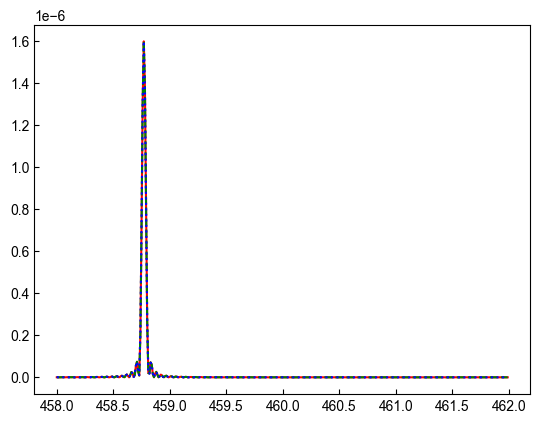

In [20]:
L = 1  # mm
dz = 0.01  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)

T = 360  # 中心膜厚

P0 = 0.1
A0 = np.sqrt(P0)
k = 4

wls = np.arange(458, 462, 0.01)

eta = []

for wl in wls:
    NF = f_NF((wl, T)).item()
    NSH = f_NS((wl, T)).item()

    Az = [A0]  # zの関数。以降で逐次計算する
    Bz = [B0]  # zの関数

    for temp_z in z[:-1]:
        temp_A = Az[-1]
        temp_B = Bz[-1]

        Az.append(temp_A*wave(dz, NF, wl) +
                  deltaA(dz, k, temp_A, temp_B, wl, NF, NSH))
        Bz.append(temp_B*wave(dz, NSH, wl/2) +
                  deltaB(dz, k, temp_A, wl, NF, NSH))

    eta.append(abs(np.array(Bz[-1]))**2/A0**2)
plt.plot(wls, eta, c='r')

eta = []

for wl in wls:
    NF = f_NF((wl, T)).item()
    NSH = f_NS((wl, T)).item()

    BdB0 = BdB(z, dz, k, A0, wl, NF, NSH)
    eta.append(abs(np.array(BdB0[-1]))**2/A0**2)
plt.plot(wls, eta, '--', c='g')

betaFs = f_NS((wls, T))*2*np.pi/(wl*10**-9)
betaSHs = f_NF((wls, T))*2*np.pi/((wl/2)*10**-9)
deltas = (betaSHs-2*betaFs)/2
etas = k**2*P0*L**2*np.sinc(deltas*L/np.pi)**2
plt.plot(wls, etas, ':', c='b')

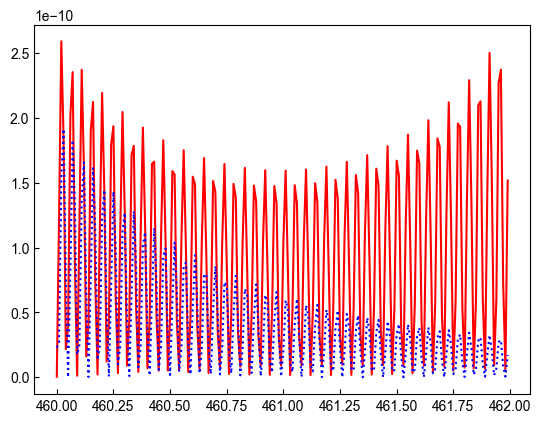

In [21]:
L = 1  # mm
dz = 0.01  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)

T = 360  # 中心膜厚

P0 = 0.1
A0 = np.sqrt(P0)
k = 4

wls = np.arange(460, 462, 0.01)

eta = []

for wl in wls:
    NF = f_NF((wl, T)).item()
    NSH = f_NS((wl, T)).item()

    Az = [A0]  # zの関数。以降で逐次計算する
    Bz = [B0]  # zの関数

    for temp_z in z[:-1]:
        temp_A = Az[-1]
        temp_B = Bz[-1]

        Az.append(temp_A*wave(dz, NF, wl) +
                  deltaA(dz, k, temp_A, temp_B, wl, NF, NSH))
        Bz.append(temp_B*wave(dz, NSH, wl/2) +
                  deltaB(dz, k, temp_A, wl, NF, NSH))

    eta.append(abs(np.array(Bz[-1]))**2/A0**2)
plt.plot(wls, eta, c='r')

betaFs = f_NS((wls, T))*2*np.pi/(wl*10**-9)
betaSHs = f_NF((wls, T))*2*np.pi/((wl/2)*10**-9)
deltas = (betaSHs-2*betaFs)/2
etas = k**2*P0*L**2*np.sinc(deltas*L/np.pi)**2
plt.plot(wls, etas, ':', c='b')

先の関数とも、解析解とも一致することを確認

膜厚傾斜を考慮して計算

傾斜スロープは0.5nm/mmとした

膜厚傾斜を考えることは実効屈折率Nがzの関数であるのと等価

膜厚傾斜を与えると急に重くなった。

基本的なルーティンは同じなのになぜ？

実効屈折率を逐次求めるのやめて、あらかじめ計算しておいてルックアップするようにしたら高速になった。

ループを工夫すればさらに高速化できそう

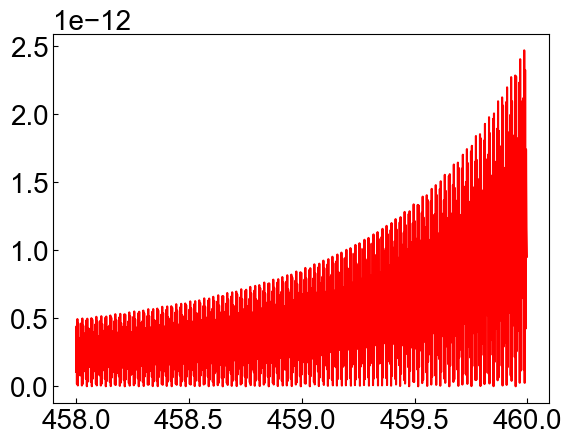

In [85]:
L = 10  # mm
dz = 0.005  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)


T = 360  # 中心膜厚
slope = 0.  # スロープ nm/mm
start_T = T-slope*L*1000/2
end_T = T+slope*L*1000/2
Tz = np.linspace(start_T, end_T, len(z))

P0 = 0.1
A0 = np.sqrt(P0)
k = 4  # W^-1/2cm^-1
k = 4*100  # W^-1/2m^-1

wls = np.arange(458, 460, 0.002)

eta = []

for wl in wls:
    Az = [A0]  # zの関数。以降で逐次計算する
    Bz = [B0]  # zの関数

    NFs = f_NF((wl, Tz))
    NSHs = f_NS((wl, Tz))
    Ks = f_k((wl, Tz))/100

    for temp_z, NF, NSH, k in zip(z[:-1], NFs[:-1], NSHs[:-1], Ks[:-1]):

        temp_A = Az[-1]
        temp_B = Bz[-1]

        Az.append(temp_A*wave(dz, NF, wl) +
                  deltaA(dz, k, temp_A, temp_B, wl, NF, NSH))
        Bz.append(temp_B*wave(dz, NSH, wl/2) +
                  deltaB(dz, k, temp_A, wl, NF, NSH))

    eta.append(abs(np.array(Bz[-1]))**2/A0**2*100)
plt.plot(wls, eta, c='r')

[0.04] nm


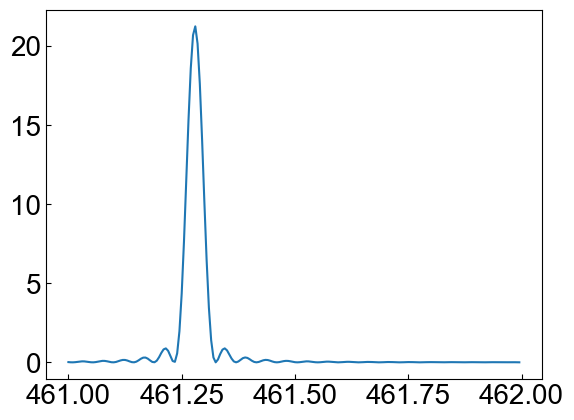

In [89]:
folder = r"C:\Users\hirot\OneDrive\大学\0-Project\04-CWpumpedAlN2layer\4-output\Optocs Express\設計データまとめ\直方体\波長分散\理論計算"

L = 1  # mm
dz = 0.005  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)


T = 360  # 中心膜厚 nm
slope = 0  # スロープ nm/mm
dT = 0  # 膜厚揺らぎ nm
start_T = T-slope*L*1000/2
end_T = T+slope*L*1000/2
Tz = np.linspace(start_T, end_T, len(z))+np.random.uniform(-dT, dT, len(z))

P0 = 1
A0 = np.sqrt(P0)
k = 4.3  # W^-1/2cm^-1
k = k*100  # W^-1/2m^-1

aF = 0  # cm^-1
aSH = 0  # cm^-1

aF = aF*100  # m^-1
aSH = aSH*100  # m^-1

wls = np.arange(461, 462, 0.005)

eta = []

for wl in wls:
    Az = [A0]  # zの関数。以降で逐次計算する
    Bz = [B0]  # zの関数

    NFs = f_NF((wl, Tz))
    NSHs = f_NS((wl, Tz))
    Ks = f_k((wl, Tz))*100

    for temp_z, NF, NSH, k in zip(z[:-1], NFs[:-1], NSHs[:-1], Ks[:-1]):

        temp_A = Az[-1]
        temp_B = Bz[-1]

        Az.append(temp_A*wave(dz, NF, wl)*np.sqrt(np.exp(-aF*dz)) +
                  deltaA(dz, k, temp_A, temp_B, wl, NF, NSH))
        Bz.append(temp_B*wave(dz, NSH, wl/2) *
                  np.sqrt(np.exp(-aSH*dz))+deltaB(dz, k, temp_A, wl, NF, NSH))

    eta.append(abs(np.array(Bz[-1]))**2/np.abs(A0)**4*100)
plt.plot(wls, eta)

norm_eta = eta/max(eta)

data = pd.DataFrame([wls, eta, norm_eta]).T
filename = f'{folder}\L={L*1000}_dz={dz*1000}_T={T}_SL={slope}_Po={P0}_k={k/100}_aF={aF}_aSH={aSH}_dT={dT}.dat'
data.to_csv(filename, index=False, header=[
            'wavelength', 'efficiency', 'norm_efficiency'])

sign = np.sign(eta-max(eta)/2)
FWFM1, FWFM2 = np.argwhere(sign[0:-2]*sign[1:-1] < 0)
print((wls[FWFM2]-wls[FWFM1]), 'nm')

[0.021] nm


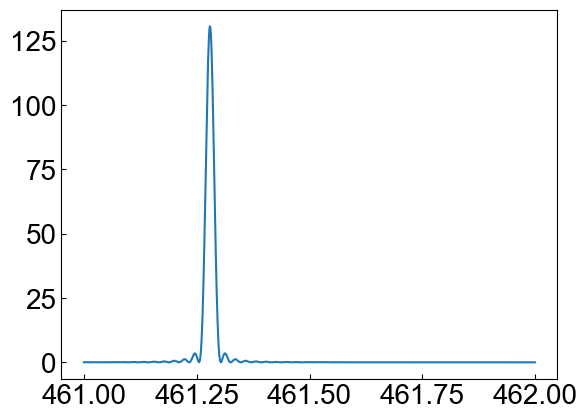

In [31]:
folder = r"C:\Users\hirot\OneDrive\大学\0-Project\04-CWpumpedAlN2layer\4-output\Optocs Express\設計データまとめ\直方体\波長分散\理論計算"

L = 2  # mm
dz = 0.005  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)


T = 360  # 中心膜厚 nm
slope = 0  # スロープ nm/mm
dT = 0  # 膜厚揺らぎ nm
start_T = T-slope*L*1000/2
end_T = T+slope*L*1000/2
Tz = np.linspace(start_T, end_T, len(z))+np.random.uniform(-dT, dT, len(z))

P0 = 1
A0 = np.sqrt(P0)
k = 4.3  # W^-1/2cm^-1
k = k*100  # W^-1/2m^-1

aF = 0  # cm^-1
aSH = 0  # cm^-1

aF = aF*100  # m^-1
aSH = aSH*100  # m^-1

wls = np.arange(461, 462, 0.001)

eta = []

for wl in wls:
    Az = [A0]  # zの関数。以降で逐次計算する
    Bz = [B0]  # zの関数

    NFs = f_NF((wl, Tz))
    NSHs = f_NS((wl, Tz))

    for temp_z, NF, NSH in zip(z[:-1], NFs[:-1], NSHs[:-1]):

        temp_A = Az[-1]
        temp_B = Bz[-1]

        Az.append(temp_A*wave(dz, NF, wl)*np.sqrt(np.exp(-aF*dz)) +
                  deltaA(dz, k, temp_A, temp_B, wl, NF, NSH))
        Bz.append(temp_B*wave(dz, NSH, wl/2) *
                  np.sqrt(np.exp(-aSH*dz))+deltaB(dz, k, temp_A, wl, NF, NSH))

    eta.append(abs(np.array(Bz[-1]))**2/np.abs(A0)**4*100)
plt.plot(wls, eta)

norm_eta = eta/max(eta)

data = pd.DataFrame([wls, eta, norm_eta]).T
filename = f'{folder}\L={L*1000}_dz={dz*1000}_T={T}_SL={slope}_Po={P0}_k={k/100}_aF={aF}_aSH={aSH}_dT={dT}.dat'
data.to_csv(filename, index=False, header=[
            'wavelength', 'efficiency', 'norm_efficiency'])

sign = np.sign(eta-max(eta)/2)
FWFM1, FWFM2 = np.argwhere(sign[0:-2]*sign[1:-1] < 0)
print((wls[FWFM2]-wls[FWFM1]), 'nm')

In [ ]:
plt.plot()

ValueError: not enough values to unpack (expected 2, got 1)

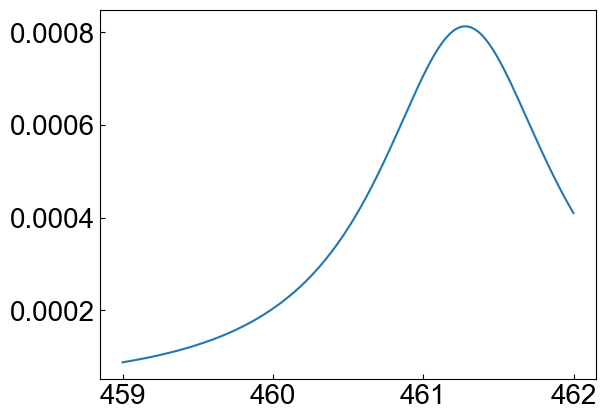

In [113]:
folder = r"C:\Users\hirot\OneDrive\大学\0-Project\04-CWpumpedAlN2layer\4-output\Optocs Express\設計データまとめ\直方体\波長分散\理論計算"

L = 3.3  # mm
dz = 0.005  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)


T = 360  # 中心膜厚 nm
slope = 0  # スロープ nm/mm
dT = 0  # 膜厚揺らぎ nm
start_T = T-slope*L*1000/2
end_T = T+slope*L*1000/2
Tz = np.linspace(start_T, end_T, len(z))+np.random.uniform(-dT, dT, len(z))

P0 = 0.001
A0 = np.sqrt(P0)
k = 60  # W^-1/2cm^-1
k = k*100  # W^-1/2m^-1

aF = 10  # cm^-1
aSH = 2000  # cm^-1

aF = aF*100  # m^-1
aSH = aSH*100  # m^-1

wls = np.arange(459, 462, 0.001)

eta = []

for wl in wls:
    Az = [A0]  # zの関数。以降で逐次計算する
    Bz = [B0]  # zの関数

    NFs = f_NF((wl, Tz))
    NSHs = f_NS((wl, Tz))

    for temp_z, NF, NSH in zip(z[:-1], NFs[:-1], NSHs[:-1]):

        temp_A = Az[-1]
        temp_B = Bz[-1]

        Az.append(temp_A*wave(dz, NF, wl)*np.sqrt(np.exp(-aF*dz)) +
                  deltaA(dz, k, temp_A, temp_B, wl, NF, NSH))
        Bz.append(temp_B*wave(dz, NSH, wl/2) *
                  np.sqrt(np.exp(-aSH*dz))+deltaB(dz, k, temp_A, wl, NF, NSH))

    eta.append(abs(np.array(Bz[-1]))**2/np.abs(A0)**4*100)
plt.plot(wls, eta)

norm_eta = eta/max(eta)

data = pd.DataFrame([wls, eta, norm_eta]).T
filename = f'{folder}\L={L*1000}_dz={dz*1000}_T={T}_SL={slope}_Po={P0}_k={k/100}_aF={aF}_aSH={aSH}_dT={dT}.dat'
data.to_csv(filename, index=False, header=[
            'wavelength', 'efficiency', 'norm_efficiency'])

sign = np.sign(eta-max(eta)/2)
FWFM1, FWFM2 = np.argwhere(sign[0:-2]*sign[1:-1] < 0)
print((wls[FWFM2]-wls[FWFM1]), 'nm')

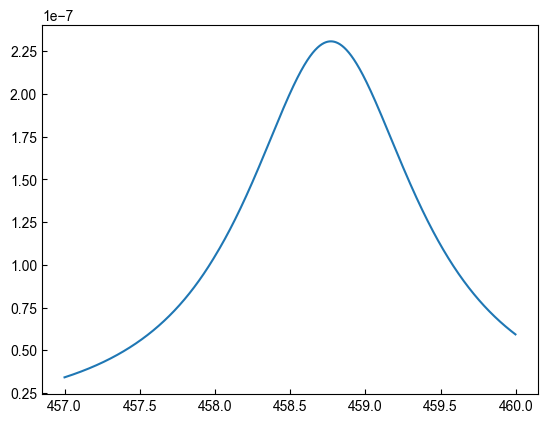

In [74]:
plt.plot(wls, eta*np.array(np.abs(A0)**2))

In [209]:
from scipy.optimize import curve_fit


def gaussian(x, amp, mean, sigma, back):
    return amp * np.exp(- (x - mean)**2 / (2 * sigma**2))+back


def lorentz(x, amp, a, b, back):
    return amp / (1+((x-a)/b)**2)+back

In [217]:
initial_guess = [0.004, 459, 0.5, 0]  # 初期パラメータの推定値
params, covariance = curve_fit(gaussian, wls, eta, p0=initial_guess)
initial_lorentz = [0.00004, 459, 2, 0]
params_lorentz, lorentz_covariance = curve_fit(
    lorentz, wls, eta, p0=initial_lorentz)

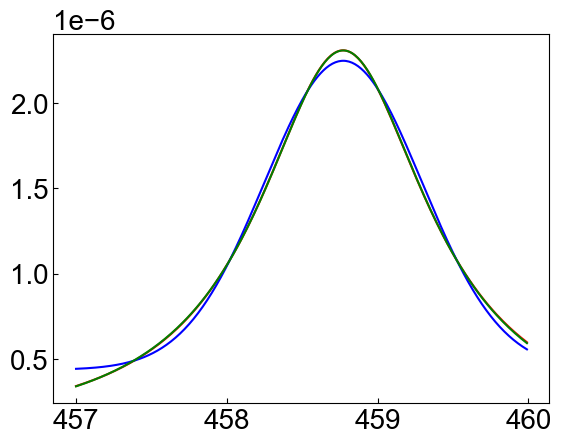

In [218]:
plt.plot(wls, eta, c='r')
plt.plot(wls, gaussian(wls, *params), color='b')
plt.plot(wls, lorentz(wls, *params_lorentz), color='g')

In [219]:
Data = pd.DataFrame([wls, lorentz(wls, *params_lorentz)]).T

In [220]:
Data.to_excel('フィッテング結果.xlsx', index=False)

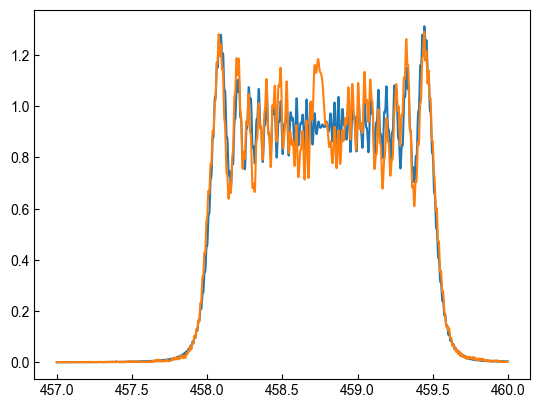

In [119]:
L = 3.3  # mm
dz = 0.005  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)


T = 360  # 中心膜厚
slope = 1.  # スロープ nm/mm
start_T = T-slope*L*1000/2
end_T = T+slope*L*1000/2
Tz = np.linspace(start_T, end_T, len(z))

P0 = 0.1
A0 = np.sqrt(P0)
k = 3.2  # W^-1/2cm^-1
k = k*100  # W^-1/2m^-1

wls = np.arange(457, 460, 0.002)

eta = []

for wl in wls:
    Az = [A0]  # zの関数。以降で逐次計算する
    Bz = [B0]  # zの関数

    NFs = f_NF((wl, Tz))
    NSHs = f_NS((wl, Tz))

    for temp_z, NF, NSH in zip(z[:-1], NFs[:-1], NSHs[:-1]):

        temp_A = Az[-1]
        temp_B = Bz[-1]

        Az.append(temp_A*wave(dz, NF, wl) +
                  deltaA(dz, k, temp_A, temp_B, wl, NF, NSH))
        Bz.append(temp_B*wave(dz, NSH, wl/2) +
                  deltaB(dz, k, temp_A, wl, NF, NSH))

    eta.append(abs(np.array(Bz[-1]))**2/A0**4*100)
plt.plot(wls, eta)

T = 360  # 中心膜厚
slope = 1.  # スロープ nm/mm
start_T = T-slope*L*1000/2
end_T = T+slope*L*1000/2
Tz = np.linspace(start_T, end_T, len(z)) + \
    np.random.uniform(-0.1, 0.1, size=len(z))

P0 = 0.1
A0 = np.sqrt(P0)
k = 3.2  # W^-1/2cm^-1
k = k*100  # W^-1/2m^-1

wls = np.arange(457, 460, 0.002)

eta = []

for wl in wls:
    Az = [A0]  # zの関数。以降で逐次計算する
    Bz = [B0]  # zの関数

    NFs = f_NF((wl, Tz))
    NSHs = f_NS((wl, Tz))

    for temp_z, NF, NSH in zip(z[:-1], NFs[:-1], NSHs[:-1]):

        temp_A = Az[-1]
        temp_B = Bz[-1]

        Az.append(temp_A*wave(dz, NF, wl) +
                  deltaA(dz, k, temp_A, temp_B, wl, NF, NSH))
        Bz.append(temp_B*wave(dz, NSH, wl/2) +
                  deltaB(dz, k, temp_A, wl, NF, NSH))

    eta.append(abs(np.array(Bz[-1]))**2/A0**4*100)
plt.plot(wls, eta)

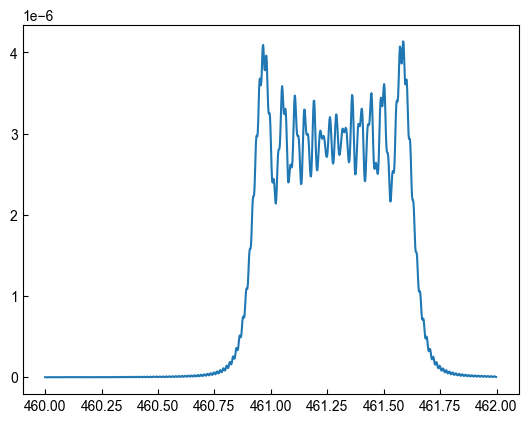

In [69]:
plt.plot(wls, np.array(eta)/100*P0)

In [62]:
EX_data = pd.read_excel(
    r"C:\Users\hirot\OneDrive\大学\0-Project\04-CWpumpedAlN2layer\4-output\Optocs Express\設計データまとめ\直方体\波長分散\膜厚ムラによるバンド幅拡大に関する考察\実験結果と照らして考察\output1.xlsx")

In [63]:
EX_data

,波長,Unnamed 0,波長.1,Unnamed 1,波長.2,Unnamed 2,波長.3,Unnamed 3,波長.4,Unnamed 4
0,457.460,0.150227,457.516,0.080131,457.512,0.116785,457.432,0.073680,457.560,0.120759
1,458.044,0.090919,458.052,0.087604,457.980,0.121922,458.052,0.111275,458.012,0.149368
2,458.508,0.085171,458.492,0.100549,458.488,0.147023,458.568,0.161079,458.504,0.205410
3,459.024,0.093814,459.028,0.148027,459.032,0.262116,459.064,0.285710,458.940,0.358278
4,459.480,0.128083,459.616,0.242301,459.532,0.447342,459.388,0.513569,459.484,0.687350
5,460.032,0.172683,460.032,0.420712,460.028,0.627187,459.528,0.568449,459.580,0.794911
6,460.540,0.245864,460.460,0.663224,460.280,0.981248,459.800,0.817066,459.724,0.938012
7,460.996,0.386192,460.756,0.803338,460.424,0.957204,459.880,0.868361,459.828,0.982566
8,461.480,0.637401,460.860,0.974095,460.472,0.899152,460.036,1.000000,459.904,0.902289
9,461.608,0.786514,460.956,0.902652,460.504,0.938297,460.124,0.932069,460.012,0.981198


In [181]:
x = np.arange(457, 463.01, 0.01)

460.1859889401229
[1.67] nm


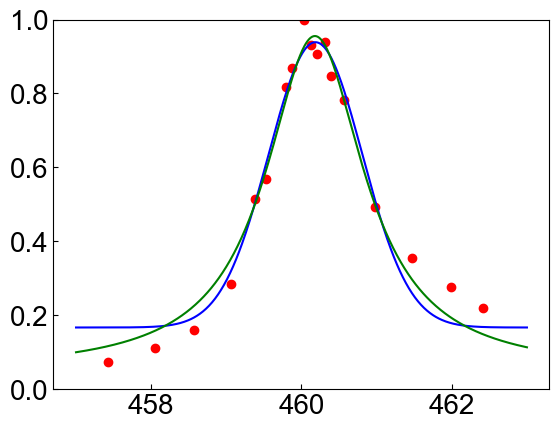

In [198]:
i = 3
ex_wl = EX_data.iloc[:, 2*i+0].dropna()
ex_SH = EX_data.iloc[:, 2*i+1].dropna()

initial_guess = [1, 461, 0.5, 0]  # 初期パラメータの推定値
params, covariance = curve_fit(gaussian, ex_wl, ex_SH, p0=initial_guess)
initial_lorentz = [1, 461, 2, 0]
params_lorentz, lorentz_covariance = curve_fit(
    lorentz, ex_wl, ex_SH, p0=initial_lorentz)

plt.scatter(ex_wl, ex_SH, c='r')
plt.plot(x, gaussian(x, *params), color='b')
plt.plot(x, lorentz(x, *params_lorentz), color='g')
plt.ylim(0, 1)

print(params[1])

df = pd.DataFrame([x, lorentz(x, *params_lorentz)]).T

# df.to_excel('幅1.5um.xlsx')

y = lorentz(x, *params_lorentz)

sign = np.sign(y-max(y)/2)
FWFM1, FWFM2 = np.argwhere(sign[0:-2]*sign[1:-1] < 0)
print((x[FWFM2]-x[FWFM1]), 'nm')

460.14483106201016


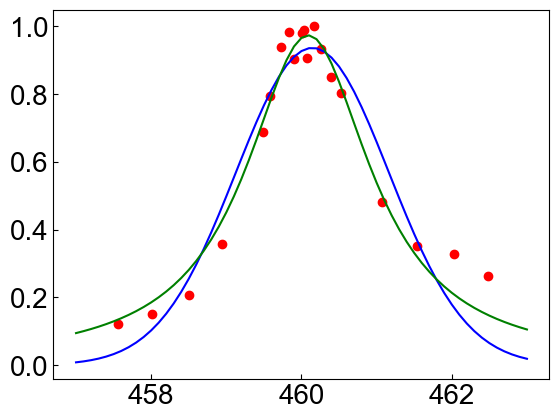

In [163]:
i = 4
ex_wl = EX_data.iloc[:, 2*i+0].dropna()
ex_SH = EX_data.iloc[:, 2*i+1].dropna()

initial_guess = [0.004, 461, 0.5]  # 初期パラメータの推定値
params, covariance = curve_fit(gaussian, ex_wl, ex_SH, p0=initial_guess)
initial_lorentz = [0.004, 461, 2]
params_lorentz, lorentz_covariance = curve_fit(
    lorentz, ex_wl, ex_SH, p0=initial_lorentz)

plt.scatter(ex_wl, ex_SH, c='r')
plt.plot(x, gaussian(x, *params), color='b')
plt.plot(x, lorentz(x, *params_lorentz), color='g')

print(params[1])

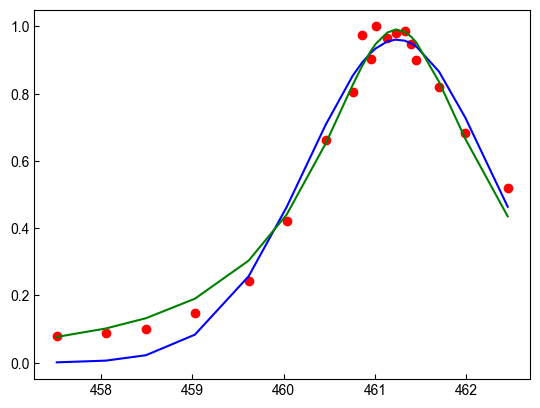

In [84]:
i = 1
ex_wl = EX_data.iloc[:, 2*i+0].dropna()
ex_SH = EX_data.iloc[:, 2*i+1].dropna()

initial_guess = [0.004, 461, 0.5]  # 初期パラメータの推定値
params, covariance = curve_fit(gaussian, ex_wl, ex_SH, p0=initial_guess)
initial_lorentz = [0.004, 461, 2]
params_lorentz, lorentz_covariance = curve_fit(
    lorentz, ex_wl, ex_SH, p0=initial_lorentz)

plt.scatter(ex_wl, ex_SH, c='r')
plt.plot(ex_wl, gaussian(ex_wl, *params), color='b')
plt.plot(ex_wl, lorentz(ex_wl, *params_lorentz), color='g')

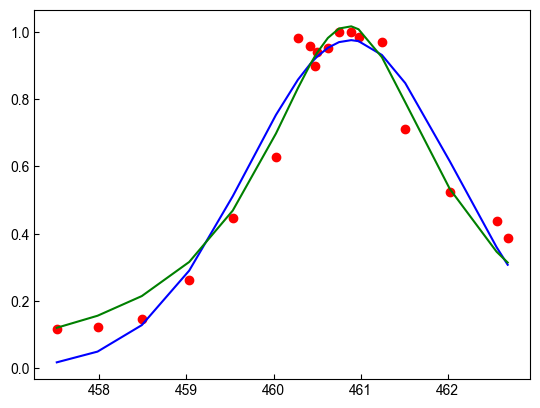

In [85]:
i = 2
ex_wl = EX_data.iloc[:, 2*i+0].dropna()
ex_SH = EX_data.iloc[:, 2*i+1].dropna()

initial_guess = [0.004, 461, 0.5]  # 初期パラメータの推定値
params, covariance = curve_fit(gaussian, ex_wl, ex_SH, p0=initial_guess)
initial_lorentz = [0.004, 461, 2]
params_lorentz, lorentz_covariance = curve_fit(
    lorentz, ex_wl, ex_SH, p0=initial_lorentz)

plt.scatter(ex_wl, ex_SH, c='r')
plt.plot(ex_wl, gaussian(ex_wl, *params), color='b')
plt.plot(ex_wl, lorentz(ex_wl, *params_lorentz), color='g')

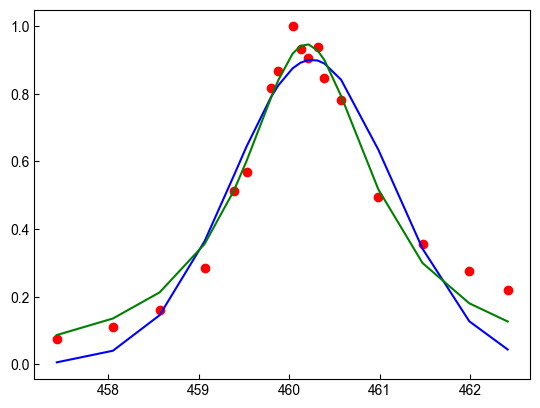

In [86]:
i = 3
ex_wl = EX_data.iloc[:, 2*i+0].dropna()
ex_SH = EX_data.iloc[:, 2*i+1].dropna()

initial_guess = [0.004, 461, 0.5]  # 初期パラメータの推定値
params, covariance = curve_fit(gaussian, ex_wl, ex_SH, p0=initial_guess)
initial_lorentz = [0.004, 461, 2]
params_lorentz, lorentz_covariance = curve_fit(
    lorentz, ex_wl, ex_SH, p0=initial_lorentz)

plt.scatter(ex_wl, ex_SH, c='r')
plt.plot(ex_wl, gaussian(ex_wl, *params), color='b')
plt.plot(ex_wl, lorentz(ex_wl, *params_lorentz), color='g')

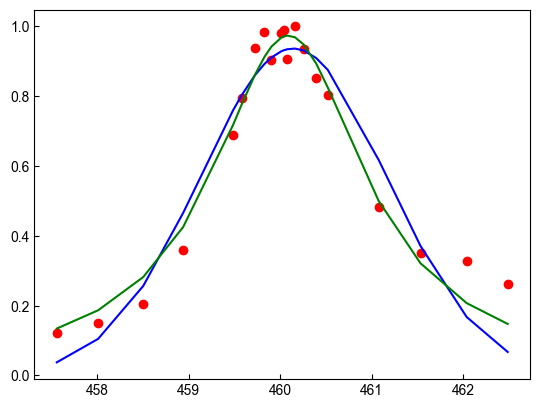

In [87]:
i = 4
ex_wl = EX_data.iloc[:, 2*i+0].dropna()
ex_SH = EX_data.iloc[:, 2*i+1].dropna()

initial_guess = [0.004, 461, 0.5]  # 初期パラメータの推定値
params, covariance = curve_fit(gaussian, ex_wl, ex_SH, p0=initial_guess)
initial_lorentz = [0.004, 461, 2]
params_lorentz, lorentz_covariance = curve_fit(
    lorentz, ex_wl, ex_SH, p0=initial_lorentz)

plt.scatter(ex_wl, ex_SH, c='r')
plt.plot(ex_wl, gaussian(ex_wl, *params), color='b')
plt.plot(ex_wl, lorentz(ex_wl, *params_lorentz), color='g')

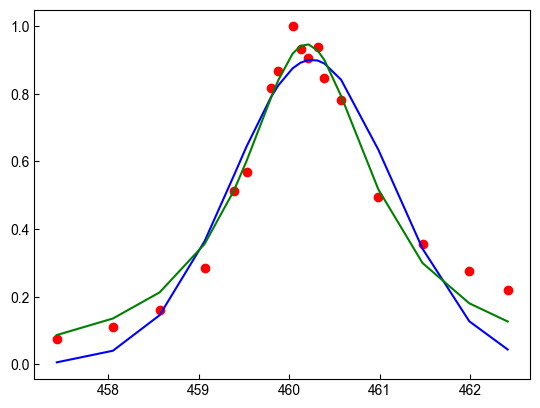

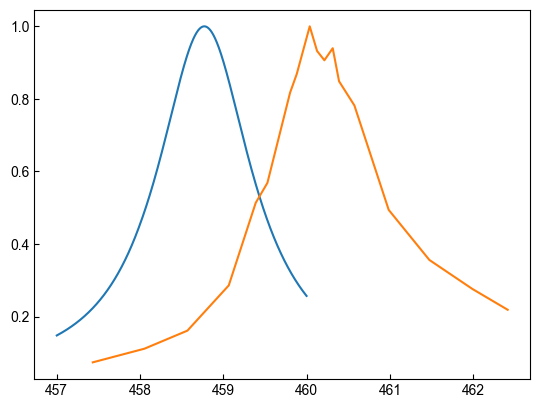

In [64]:
i = 3
ex_wl = EX_data.iloc[:, 2*i+0]
ex_SH = EX_data.iloc[:, 2*i+1]
ex_SH = ex_SH/max(ex_SH)
plt.plot(wls, norm_eta)
plt.plot(ex_wl, ex_SH)

In [ ]:
def deltaA(dz, k, A, B, wl, NF, NSH):
    betaF = NF*2*np.pi/(wl*10**-9)
    betaSH = NSH*2*np.pi/((wl/2)*10**-9)
    delta = (betaSH-2*betaF)/2
    return -1j*k.conjugate()*A.conjugate()*B*np.exp(-1j*2*delta*dz)*dz


def deltaB(dz, k, A, wl, NF, NSH):
    betaF = NF*2*np.pi/(wl*10**-9)
    betaSH = NSH*2*np.pi/((wl/2)*10**-9)
    delta = (betaSH-2*betaF)/2
    return -1j*k*A**2*np.exp(1j*2*delta*dz)*dz


def wave(z, N, wl):
    beta = N*2*np.pi/(wl*10**-9)
    return np.exp(1j*beta*z)

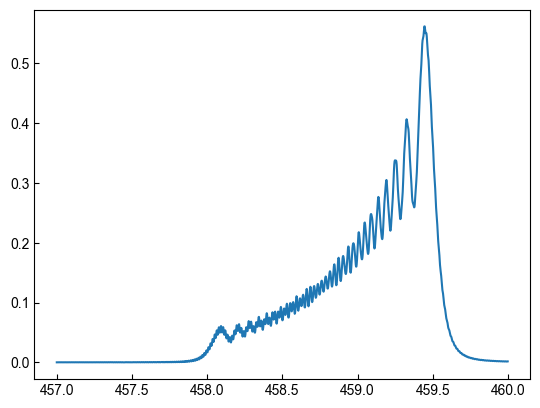

In [126]:
L = 3.3  # mm
dz = 0.005  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)


T = 360  # 中心膜厚
slope = 1.  # スロープ nm/mm
start_T = T-slope*L*1000/2
end_T = T+slope*L*1000/2
Tz = np.linspace(start_T, end_T, len(z))

P0 = 0.01
A0 = np.sqrt(P0)
k = 3.2  # W^-1/2cm^-1
k = k*100  # W^-1/2m^-1

wls = np.arange(457, 460, 0.002)

eta = []

for wl in wls:
    Az = [A0]  # zの関数。以降で逐次計算する
    Bz = [B0]  # zの関数

    NFs = f_NF((wl, Tz))
    NSHs = f_NS((wl, Tz))

    for temp_z, NF, NSH in zip(z[:-1], NFs[:-1], NSHs[:-1]):

        temp_A = Az[-1]
        temp_B = Bz[-1]

        Az.append(temp_A*wave(dz, NF, wl)*np.sqrt(np.exp(-100*dz)) +
                  deltaA(dz, k, temp_A, temp_B, wl, NF, NSH))
        Bz.append(temp_B*wave(dz, NSH, wl/2) *
                  np.sqrt(np.exp(-1000*dz))+deltaB(dz, k, temp_A, wl, NF, NSH))

    eta.append(abs(np.array(Bz[-1]))**2/A0**4*100)
plt.plot(wls, eta)

In [51]:
sign = np.sign(norm_eta-max(norm_eta)/2)
FWFM1, FWFM2 = np.argwhere(sign[0:-2]*sign[1:-1] < 0)


print((wls[FWFM2]-wls[FWFM1]), 'nm')

[0.714] nm


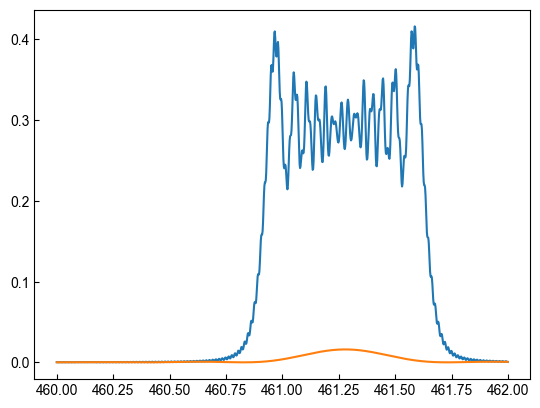

In [65]:
L = 3.2  # mm
dz = 0.005  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)


T = 360  # 中心膜厚
slope = 0.5  # スロープ nm/mm
start_T = T-slope*L*1000/2
end_T = T+slope*L*1000/2
Tz = np.linspace(start_T, end_T, len(z))

P0 = 0.1
A0 = np.sqrt(P0)
k = 4  # W^-1/2cm^-1
k = 4*100  # W^-1/2m^-1

wls = np.arange(460, 462, 0.002)

eta = []

for wl in wls:
    Az = [A0]  # zの関数。以降で逐次計算する
    Bz = [B0]  # zの関数

    NFs = f_NF((wl, Tz))
    NSHs = f_NS((wl, Tz))

    for temp_z, NF, NSH in zip(z[:-1], NFs[:-1], NSHs[:-1]):

        temp_A = Az[-1]
        temp_B = Bz[-1]

        Az.append(temp_A*wave(dz, NF, wl) +
                  deltaA(dz, k, temp_A, temp_B, wl, NF, NSH))
        Bz.append(temp_B*wave(dz, NSH, wl/2) +
                  deltaB(dz, k, temp_A, wl, NF, NSH))

    eta.append(abs(np.array(Bz[-1]))**2/A0**2*100)
plt.plot(wls, eta)


L = .1  # mm
dz = 0.005  # mm
L = L/1000  # mに変換
dz = dz/1000
z = np.arange(0, L+dz, dz)


T = 360  # 中心膜厚
slope = 0.5  # スロープ nm/mm
start_T = T-slope*L*1000/2
end_T = T+slope*L*1000/2
Tz = np.linspace(start_T, end_T, len(z))

P0 = 0.1
A0 = np.sqrt(P0)
k = 4  # W^-1/2cm^-1
k = 4*100  # W^-1/2m^-1

wls = np.arange(460, 462, 0.002)

eta = []

for wl in wls:
    Az = [A0]  # zの関数。以降で逐次計算する
    Bz = [B0]  # zの関数

    NFs = f_NF((wl, Tz))
    NSHs = f_NS((wl, Tz))

    for temp_z, NF, NSH in zip(z[:-1], NFs[:-1], NSHs[:-1]):

        temp_A = Az[-1]
        temp_B = Bz[-1]

        Az.append(temp_A*wave(dz, NF, wl) +
                  deltaA(dz, k, temp_A, temp_B, wl, NF, NSH))
        Bz.append(temp_B*wave(dz, NSH, wl/2) +
                  deltaB(dz, k, temp_A, wl, NF, NSH))

    eta.append(abs(np.array(Bz[-1]))**2/A0**2*100)
plt.plot(wls, eta)